# DATA EXPLORATION

In [84]:
# IMPORTING LIBRARIES
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [102]:
#LOAD THE DATASET

df=pd.read_csv("C:\\Users\\HP\\Downloads\\Employee.csv")
df


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [96]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [97]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [9]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [15]:
# List unique values and their lengths for each feature
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {unique_count}\n")

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [16]:
#statisrical analysis

df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [19]:
df.describe(include="object")

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [20]:
df.describe(include="all")

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [103]:
# Rename the 'Age' column to 'employee_Age'
df.rename(columns={'Age': 'employee_Age','Salary':'employee_salary'}, inplace=True)
df

,Company,employee_Age,employee_salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# DATA CLEANING

In [27]:
df.isnull().sum()

Company             8
employee_Age       18
employee_salary    24
Place              14
Country             0
Gender              0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          140 non-null    object 
 1   employee_Age     130 non-null    float64
 2   employee_salary  124 non-null    float64
 3   Place            134 non-null    object 
 4   Country          148 non-null    object 
 5   Gender           148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [104]:
# Replace the Value 0 in Age as NaN
df['employee_Age'].replace(0,np.nan,inplace=True)

print(df['employee_Age'].unique())

[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17. 54.]


In [45]:
df.duplicated().sum()

4

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

0

In [48]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    outliers = detect_outliers(df[column])
    print(f"\nOutliers in {column}:")
    print(outliers)


Outliers in employee_Age:
Series([], Name: employee_Age, dtype: float64)

Outliers in employee_salary:
Series([], Name: employee_salary, dtype: float64)

Outliers in Gender:
6      1
7      1
8      1
24     1
25     1
26     1
27     1
28     1
35     1
44     1
45     1
61     1
62     1
63     1
71     1
81     1
96     1
97     1
98     1
99     1
106    1
107    1
116    1
117    1
124    1
125    1
126    1
132    1
135    1
143    1
145    1
146    1
Name: Gender, dtype: int64


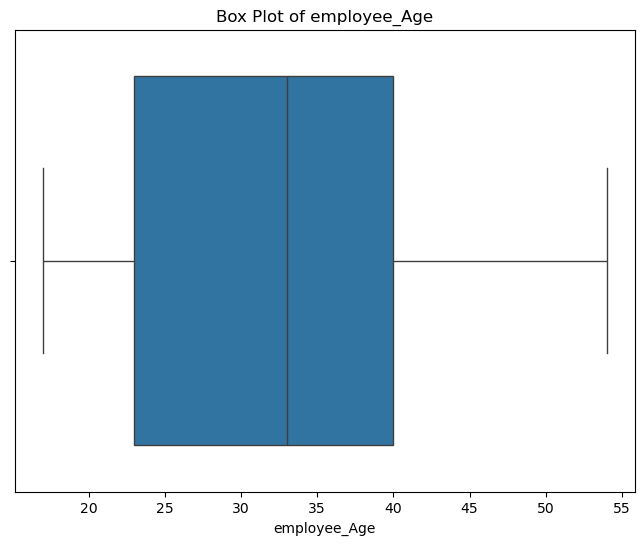

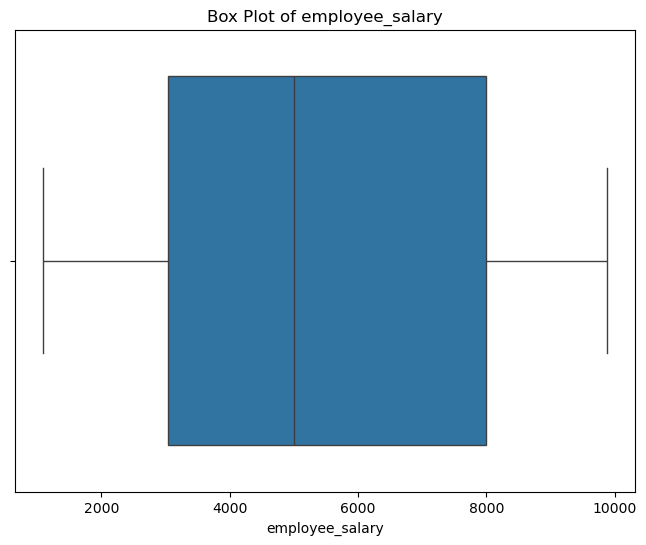

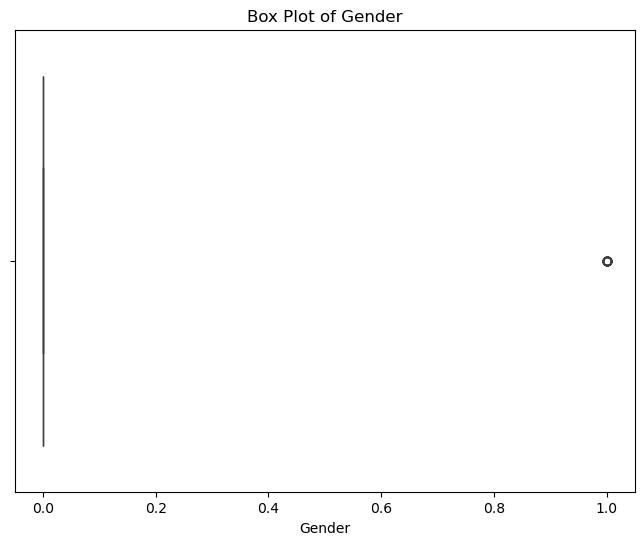

In [49]:
# Draw box plots for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a box plot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.boxplot(x=df[column])  # Create the box plot
    plt.title(f'Box Plot of {column}')  # Add a title
    plt.xlabel(column)  # Label the x-axis
    plt.show()  # Display the plot

In [50]:
df['Gender'] = df['Gender'].astype('object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          136 non-null    object 
 1   employee_Age     121 non-null    float64
 2   employee_salary  121 non-null    float64
 3   Place            130 non-null    object 
 4   Country          144 non-null    object 
 5   Gender           144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 7.9+ KB


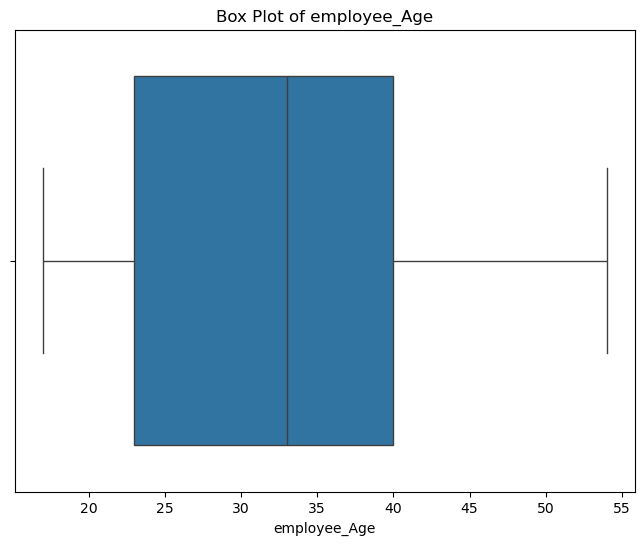

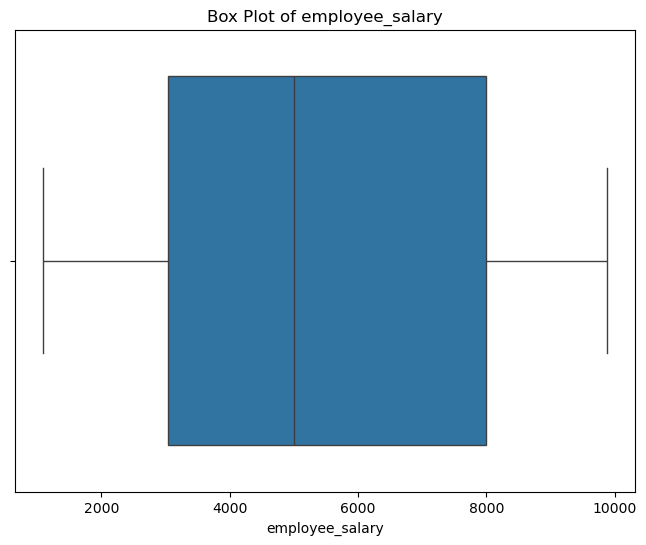

In [52]:
# Draw box plots for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a box plot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.boxplot(x=df[column])  # Create the box plot
    plt.title(f'Box Plot of {column}')  # Add a title
    plt.xlabel(column)  # Label the x-axis
    plt.show()  # Display the plot

In [54]:
df['Company'].fillna(df['Company'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          144 non-null    object 
 1   employee_Age     121 non-null    float64
 2   employee_salary  121 non-null    float64
 3   Place            130 non-null    object 
 4   Country          144 non-null    object 
 5   Gender           144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 7.9+ KB


In [58]:
df['employee_Age'].fillna(df['employee_Age'].median(), inplace=True)
df['employee_salary'].fillna(df['employee_salary'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          144 non-null    object 
 1   employee_Age     144 non-null    float64
 2   employee_salary  144 non-null    float64
 3   Place            130 non-null    object 
 4   Country          144 non-null    object 
 5   Gender           144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 7.9+ KB


In [60]:
df['Place'].fillna(df['Place'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          144 non-null    object 
 1   employee_Age     144 non-null    float64
 2   employee_salary  144 non-null    float64
 3   Place            144 non-null    object 
 4   Country          144 non-null    object 
 5   Gender           144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 7.9+ KB


In [62]:
df.isnull().sum()

Company            0
employee_Age       0
employee_salary    0
Place              0
Country            0
Gender             0
dtype: int64

# DATA ANALYSIS


In [66]:
#Filter the data with age >40 and salary<5000
filtered_df = df[(df['employee_Age'] > 40) & (df['employee_salary'] < 5000)]
filtered_df


,Company,employee_Age,employee_salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


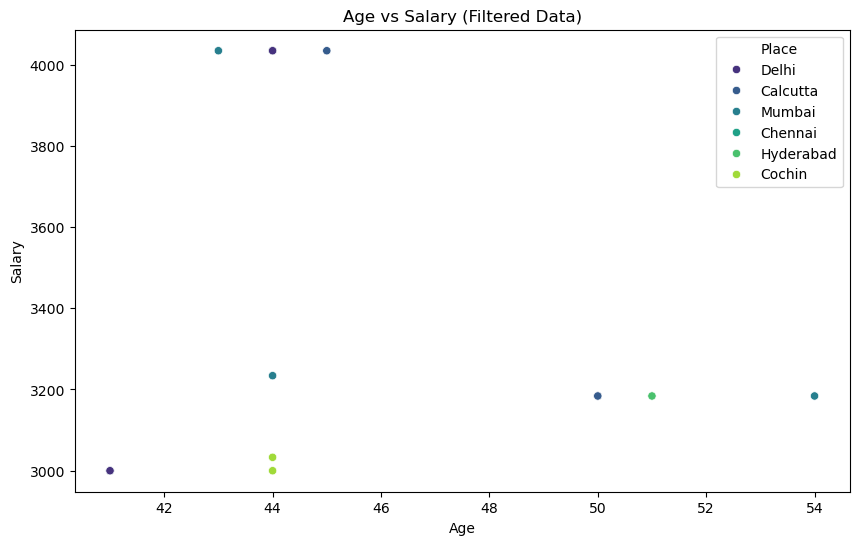

In [67]:
# 2. Plot the chart with Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='employee_Age', y='employee_salary', data=filtered_df, hue='Place', palette='viridis')
plt.title('Age vs Salary (Filtered Data)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


In [69]:
# 3. Count the number of people from each place
place_counts = df['Place'].value_counts()
place_counts

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

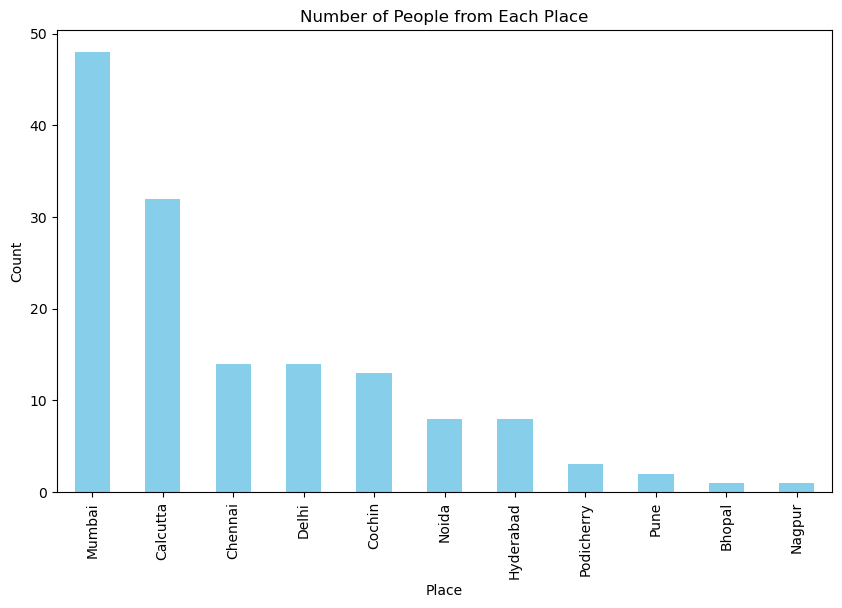

In [70]:
# Visual representation of the count
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

# DTA ENCODING

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [105]:

columns_to_encode = ['Company','Place','Country','Gender']
df = pd.get_dummies(df, columns=columns_to_encode)
df

,employee_Age,employee_salary,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,...,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India,Gender_0,Gender_1
0,20.0,NaN,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,30.0,NaN,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
2,35.0,2300.0,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False
3,40.0,3000.0,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
4,23.0,4000.0,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.0,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,True
144,22.0,8787.0,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
145,44.0,4034.0,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
146,33.0,5034.0,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   employee_Age                       124 non-null    float64
 1   employee_salary                    124 non-null    float64
 2   Company_CTS                        148 non-null    bool   
 3   Company_Congnizant                 148 non-null    bool   
 4   Company_Infosys                    148 non-null    bool   
 5   Company_Infosys Pvt Lmt            148 non-null    bool   
 6   Company_TCS                        148 non-null    bool   
 7   Company_Tata Consultancy Services  148 non-null    bool   
 8   Place_Bhopal                       148 non-null    bool   
 9   Place_Calcutta                     148 non-null    bool   
 10  Place_Chennai                      148 non-null    bool   
 11  Place_Cochin                       148 non-null    bool   

 # FEATURE SCALING